# **4. EDA**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Cargar el archivo CSV
df = pd.read_csv('../data/processed/campana_marketing.csv', parse_dates=['Dt_Customer'])

# Convertir la columna 'Income' de float64 a int64
df['Income'] = df['Income'].astype('int64')

## Análisis no gráfico

In [3]:
print("\n**Las primeras filas del DataFrame:**")
df.head()


**Las primeras filas del DataFrame:**


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Seniority,Child_Home,AcceptedCmp,Spent,Age
0,5524,1957,2,0,58138,0,0,2012-09-04,58,635,...,0,0,0,1,663,0.948498,0,0,1617,60
1,2174,1954,2,0,46344,1,1,2014-03-08,38,11,...,0,0,0,0,113,0.161660,1,0,27,63
2,4141,1965,2,1,71613,0,0,2013-08-21,26,426,...,0,0,0,0,312,0.446352,0,0,776,52
3,6182,1984,2,1,26646,1,0,2014-02-10,26,11,...,0,0,0,0,139,0.198856,1,0,53,33
4,5324,1981,4,1,58293,1,0,2014-01-19,94,173,...,0,0,0,0,161,0.230329,1,0,422,36


In [4]:
print("\n**Información estructural del DataFrame:**")
df.info()

print("\n**Estadísticas descriptivas:**")
df.describe()


**Información estructural del DataFrame:**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   int64         
 3   Marital_Status       2212 non-null   int64         
 4   Income               2212 non-null   int64         
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64    

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Seniority,Child_Home,AcceptedCmp,Spent,Age
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5587.731917,1968.932640,2.458409,0.646474,51954.459765,0.442586,0.505425,2013-07-10 17:28:06.075949312,49.050633,305.030741,...,0.063743,0.013562,0.009494,0.149638,353.272152,0.505396,0.693490,0.207052,606.711573,48.067360
min,0.000000,1940.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,18.000000
25%,2814.750000,1959.000000,2.000000,0.000000,35233.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.257511,0.000000,0.000000,68.750000,40.000000
50%,5458.500000,1970.000000,2.000000,1.000000,51381.500000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,173.500000,...,0.000000,0.000000,0.000000,0.000000,355.000000,0.507868,1.000000,0.000000,396.000000,47.000000
75%,8421.750000,1977.000000,3.000000,1.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.500000,...,0.000000,0.000000,0.000000,0.000000,529.000000,0.756795,1.000000,0.000000,1047.250000,58.000000
max,11191.000000,1999.000000,4.000000,1.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,1.000000,1.000000,1.000000,2525.000000,77.000000
std,3247.944128,11.716942,1.004552,0.478172,21530.922244,0.537052,0.544258,NaN,28.940794,337.611255,...,0.244350,0.115691,0.096994,0.356797,202.376279,0.289523,0.461148,0.405285,603.163013,11.716942


In [5]:
# Comprobar valores nulos
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Days                   0
Seniority              0
Child_Home             0
AcceptedCmp            0
Spent                  0
Age                    0
dtype: int64


In [6]:
# Verificar si hay filas duplicadas
duplicated_rows = df.duplicated()
num_duplicated_rows = duplicated_rows.sum()
print(f'Número de filas duplicadas: {num_duplicated_rows}')

Número de filas duplicadas: 0


In [7]:
# Variables categóricas
df.value_counts()

ID     Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Days  Seniority  Child_Home  AcceptedCmp  Spent  Age
11191  1986        2          0               41411   0        0         2013-12-07   11       37        32         38               11               3                 18            1                  2                1                    4                  6                  0             0             0             0             0             0         0         204   0.291845   0           0            139    31     1
0      1985        2          1               70951   0        0         2013-05-04   66       239       10         554              254              87   

In [8]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(num_columns)  # Verifica si hay columnas numéricas
print(df.dtypes)  # Revisa los tipos de datos

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Days', 'Seniority', 'Child_Home',
       'AcceptedCmp', 'Spent', 'Age'],
      dtype='object')
ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                          int64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 in

In [9]:
# Contar el número de clientes que no han aceptado ninguna campaña
num_no_accepted = df['AcceptedCmp'].value_counts()[0]

# Contar el número de clientes que han aceptado al menos una campaña
num_accepted = df['AcceptedCmp'].value_counts().sum() - num_no_accepted

# Mostrar los resultados
print("Número de clientes que no han aceptado ninguna campaña:", num_no_accepted)
print("Número de clientes que han aceptado al menos una campaña:", num_accepted)
print(f"Efectividad general de las campañas (clientes que aceptaron al menos una): {(num_accepted / len(df)) * 100:.2f}%")

Número de clientes que no han aceptado ninguna campaña: 1754
Número de clientes que han aceptado al menos una campaña: 458
Efectividad general de las campañas (clientes que aceptaron al menos una): 20.71%


## Análisis gráfico

### Histogramas para variables numéricas

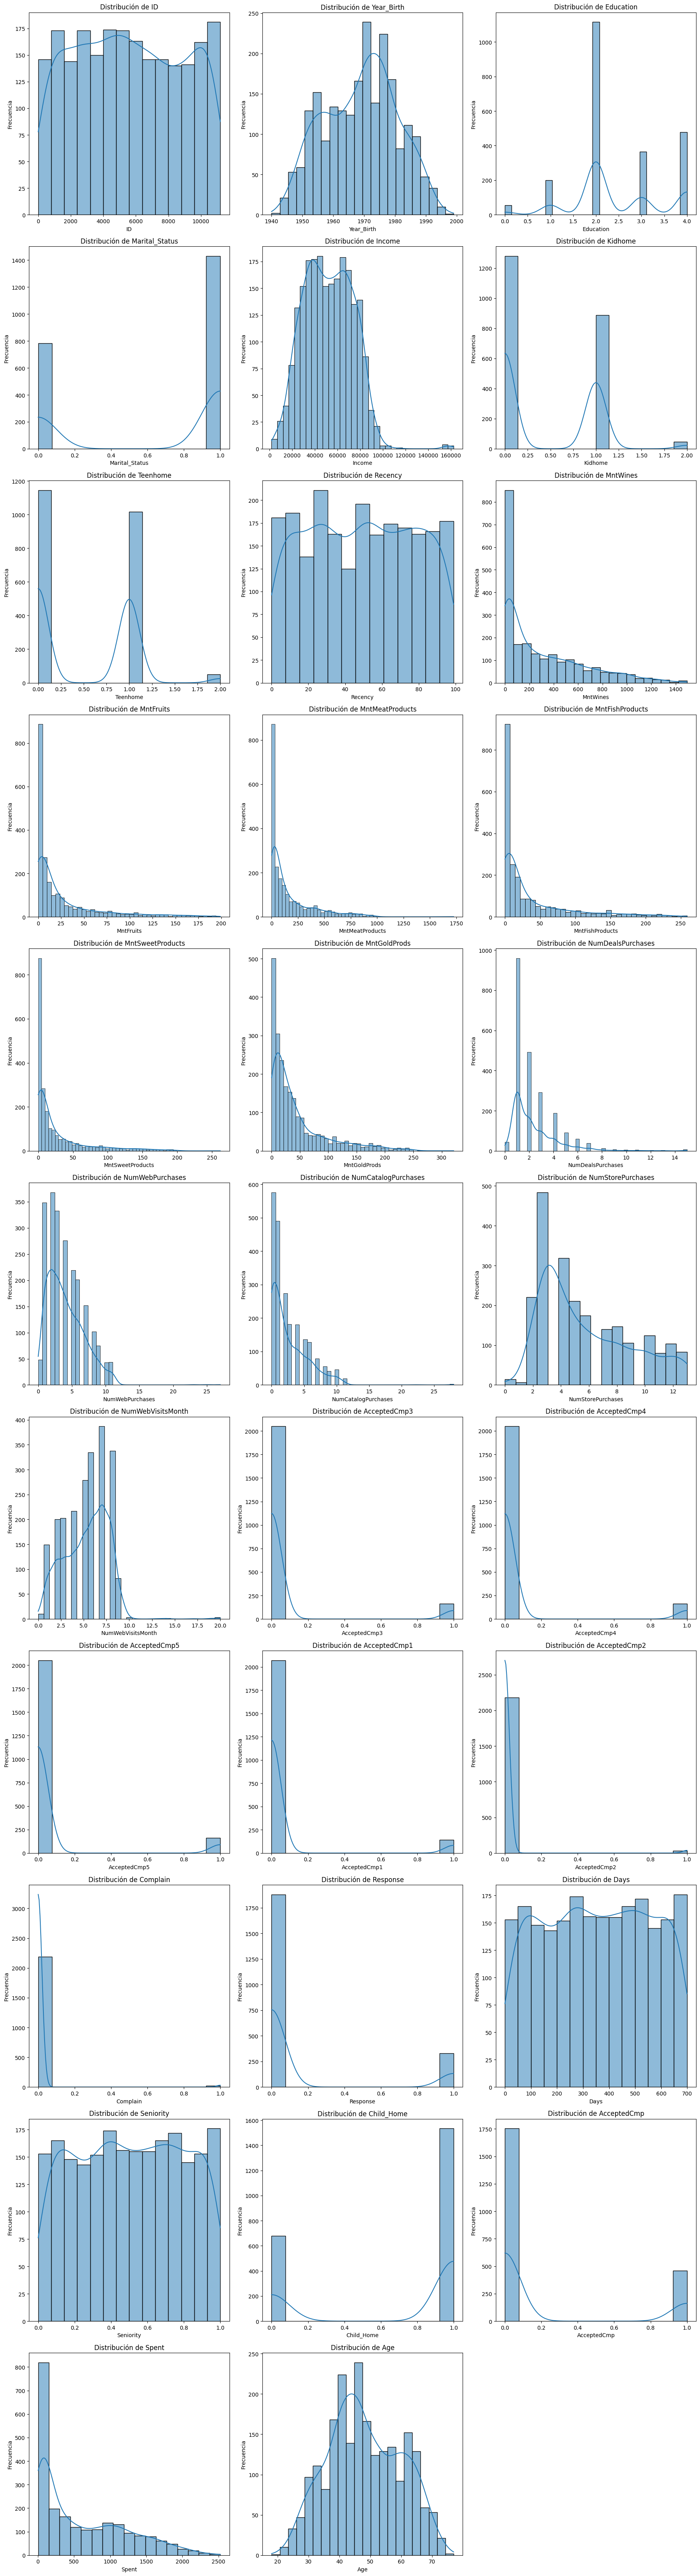

In [10]:
# Seleccionar columnas numéricas
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(num_columns)

# Calcular el número de filas y columnas necesarias para acomodar todas las columnas numéricas
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # División entera y redondeo hacia arriba

# Configurar el tamaño de la figura
plt.figure(figsize=(18, num_rows * 6))

# Iterar sobre las columnas numéricas para crear histogramas
for i, col in enumerate(num_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()

### Distribución del Número de Campañas Aceptadas por Cliente

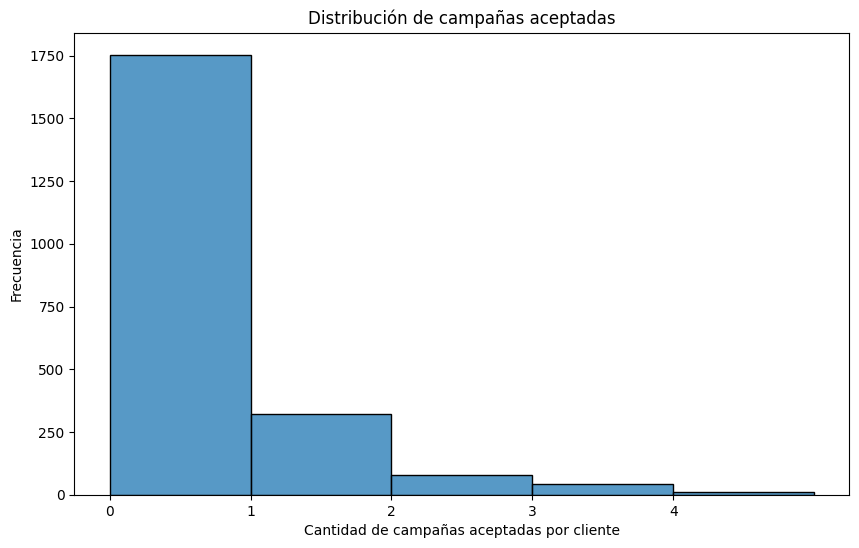

In [11]:
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columns_of_interest = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
]

# Crear un DataFrame solo con estas columnas
df_interest = df[columns_of_interest].copy()

# Crear una nueva columna que sume los valores de 1 en cada fila
df_interest.loc[:, 'Sum_ones'] = df_interest.sum(axis=1)

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_interest['Sum_ones'], bins=range(0, df_interest['Sum_ones'].max() + 2), kde=False)
plt.title('Distribución de campañas aceptadas')
plt.xlabel('Cantidad de campañas aceptadas por cliente')
plt.ylabel('Frecuencia')
plt.xticks(range(0, df_interest['Sum_ones'].max() + 1))
plt.show()

### Distribución de la aceptación de alguna de las campañas

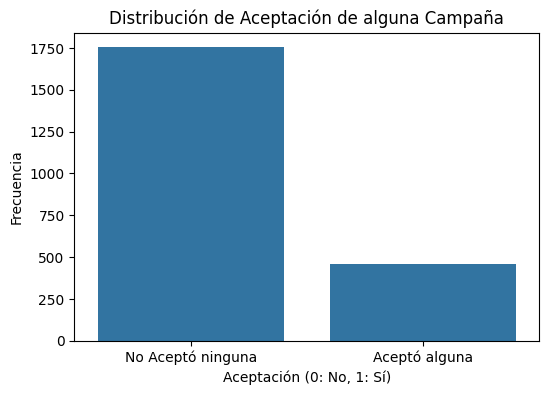

In [12]:
# Graficar la distribución de AcceptedCmp:
plt.figure(figsize=(6, 4))
sns.countplot(x='AcceptedCmp', data=df)
plt.title('Distribución de Aceptación de alguna Campaña')
plt.xlabel('Aceptación (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Aceptó ninguna', 'Aceptó alguna'])
plt.show()

### Distribución de la edad

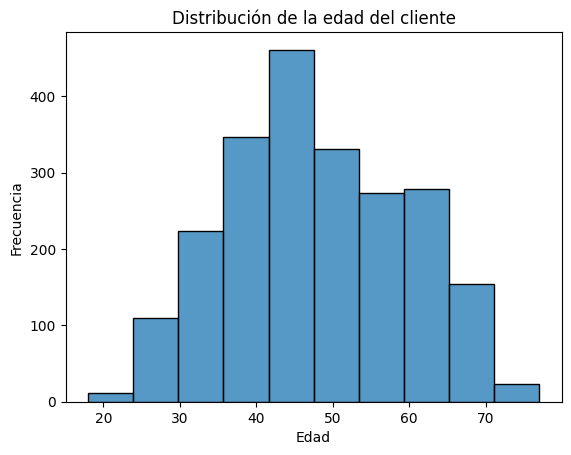

In [13]:
# Crear histograma para Age
plt.title('Distribución de la edad del cliente')
sns.histplot(data= df, x= 'Age', bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de ingresos

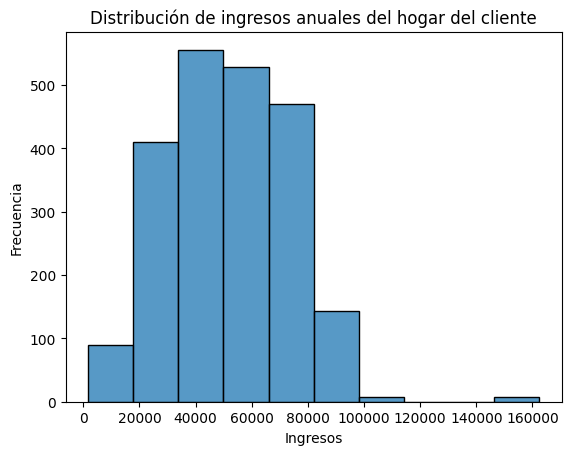

In [14]:
# Crear histograma para Income
plt.title('Distribución de ingresos anuales del hogar del cliente')
sns.histplot(data= df, x= 'Income', bins=10)
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

### Distribución del gasto por categoría de producto

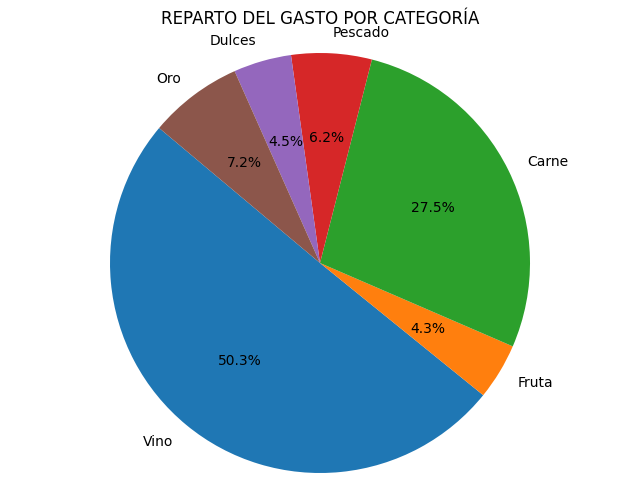

In [15]:
total_spent = df['Spent'].sum()
categories = ['Vino', 'Fruta', 'Carne', 'Pescado', 'Dulces', 'Oro']
spending = [df['MntWines'].sum() / total_spent,
            df['MntFruits'].sum() / total_spent,
            df['MntMeatProducts'].sum() / total_spent,
            df['MntFishProducts'].sum() / total_spent,
            df['MntSweetProducts'].sum() / total_spent,
            df['MntGoldProds'].sum() / total_spent]
plt.figure(figsize=(8, 6))
plt.pie(spending, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('REPARTO DEL GASTO POR CATEGORÍA')
plt.axis('equal')
plt.show()

### Distribución de la aceptación de cada campaña

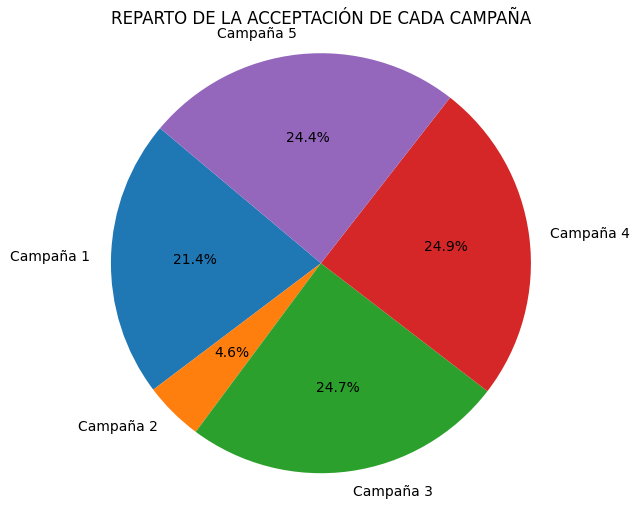

In [16]:
accepted= df['AcceptedCmp'].sum()
cpn = ['Campaña 1', 'Campaña 2', 'Campaña 3', 'Campaña 4', 'Campaña 5']
cpn_pos_reaction = [df['AcceptedCmp1'].sum() / accepted,
            df['AcceptedCmp2'].sum() / accepted,
            df['AcceptedCmp3'].sum() / accepted,
            df['AcceptedCmp4'].sum() / accepted,
            df['AcceptedCmp5'].sum() / accepted,]
plt.figure(figsize=(8, 6))
plt.pie(cpn_pos_reaction, labels=cpn, autopct='%1.1f%%', startangle=140)
plt.title('REPARTO DE LA ACCEPTACIÓN DE CADA CAMPAÑA')
plt.axis('equal')
plt.show()

### Distribución marital

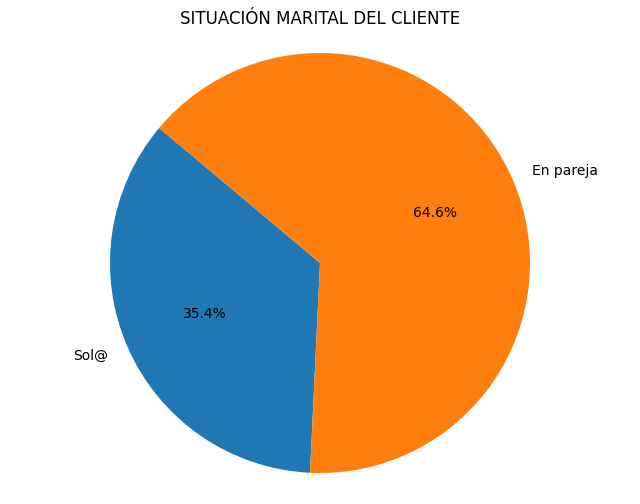

In [17]:
mar_stat= df.groupby('Marital_Status')['ID'].count().reset_index()
tot= df.shape[0]
mar_pie = [mar_stat.loc[0, 'ID'] / tot, mar_stat.loc[1, 'ID'] / tot]
plt.figure(figsize=(8, 6))
plt.pie(mar_pie, labels=['Sol@', 'En pareja'], autopct='%1.1f%%', startangle=140)
plt.title('SITUACIÓN MARITAL DEL CLIENTE')
plt.axis('equal')
plt.show()

### Distribución de hijos

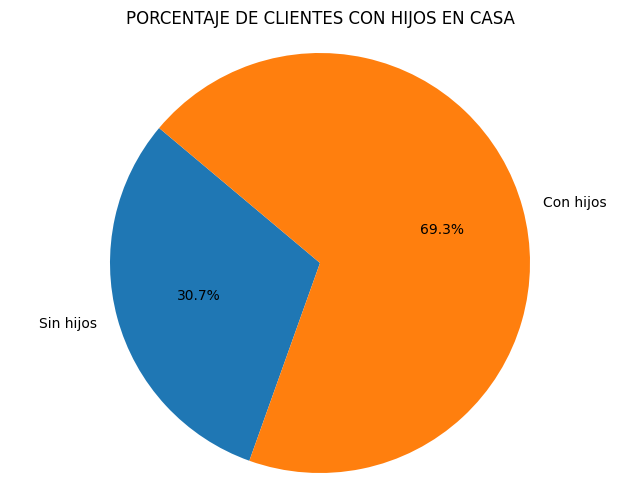

In [18]:
kids_stat= df.groupby('Child_Home')['ID'].count().reset_index()
kids_pie = [kids_stat.loc[0, 'ID'] / tot, kids_stat.loc[1, 'ID'] / tot]
plt.figure(figsize=(8, 6))
plt.pie(kids_pie, labels=['Sin hijos', 'Con hijos'], autopct='%1.1f%%', startangle=140)
plt.title('PORCENTAJE DE CLIENTES CON HIJOS EN CASA')
plt.axis('equal')
plt.show()

### ¿Cuántos más hijos, más gasto en dulces? - **NO**

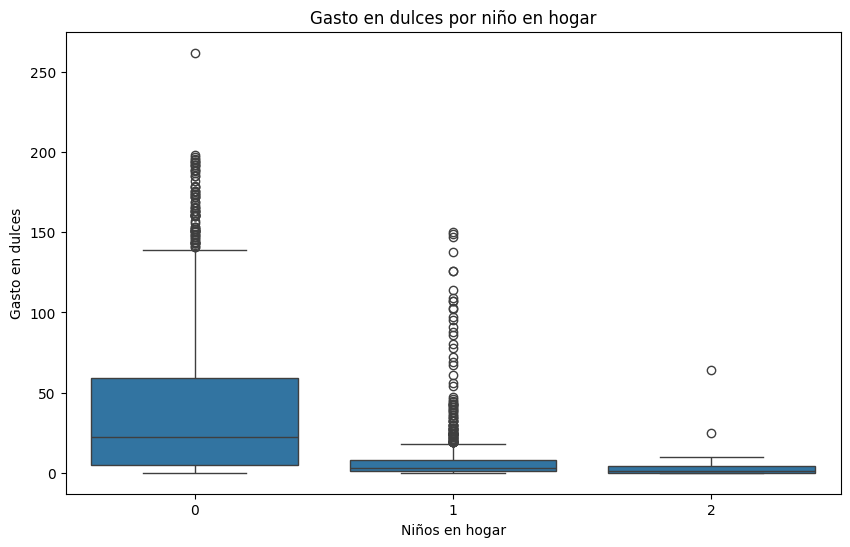

In [19]:
# Cantidad gastada en dulces en los últimos 2 años por número de hijos en el hogar del cliente
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kidhome', y='MntSweetProducts', data=df)
plt.title('Gasto en dulces por niño en hogar')
plt.xlabel('Niños en hogar')
plt.ylabel('Gasto en dulces')
plt.show()

### ¿Las rentas bajas aceptan mejor las ofertas? - **NO en campaña, pero SÍ se hacen más compras con descuento**

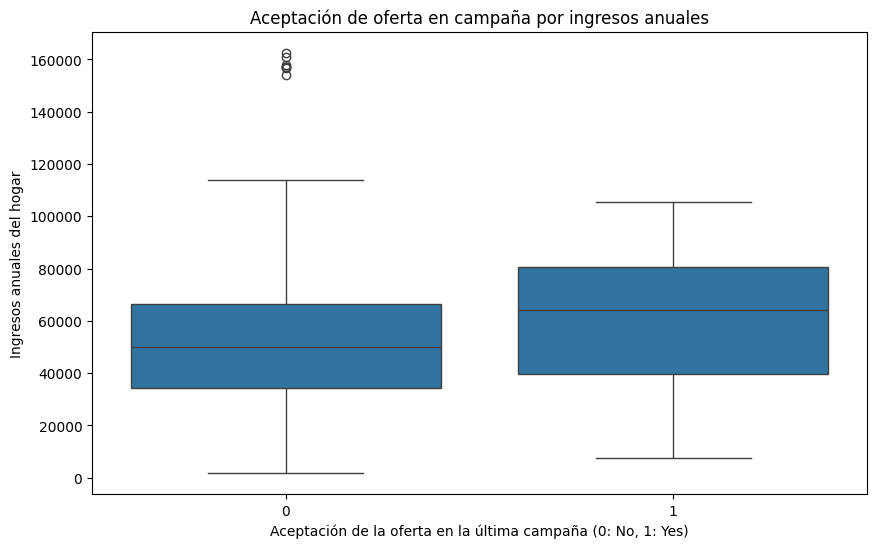

In [20]:
# Ingresos anuales del hogar del cliente por la aceptación de la oferta en la última campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Aceptación de oferta en campaña por ingresos anuales')
plt.xlabel('Aceptación de la oferta en la última campaña (0: No, 1: Yes)')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

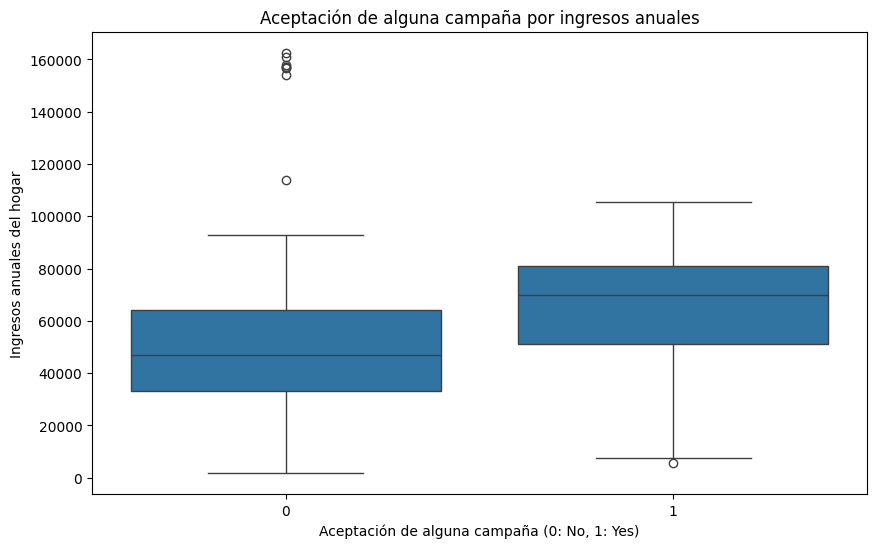

In [21]:
# Ingresos anuales del hogar del cliente por la aceptación de alguna campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='AcceptedCmp', y='Income', data=df)
plt.title('Aceptación de alguna campaña por ingresos anuales')
plt.xlabel('Aceptación de alguna campaña (0: No, 1: Yes)')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

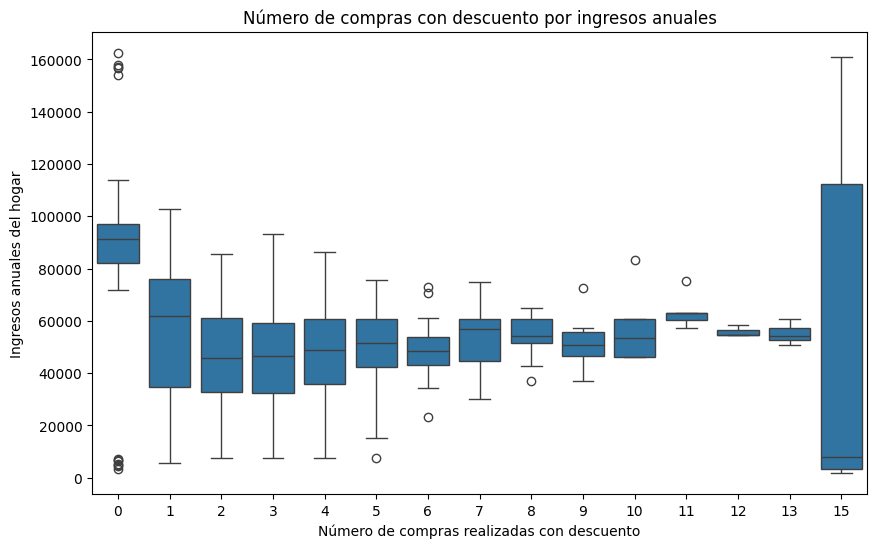

In [22]:
# Ingresos anuales del hogar del cliente por el número de compras realizadas con descuento
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumDealsPurchases', y='Income', data=df)
plt.title('Número de compras con descuento por ingresos anuales')
plt.xlabel('Número de compras realizadas con descuento')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

### ¿Cuál es el ingreso anual promedio de los clientes que realizaron la mayor cantidad de compras con descuento?

In [23]:
# Filtrar el DataFrame donde NumDealsPurchases es 15
filtered_df = df[df['NumDealsPurchases'] == 15]

# Calcular la media de la columna Income en el DataFrame filtrado
mean_income = filtered_df['Income'].mean()

print(f"La media de ingresos anuales donde el número de copras con descuento es el máximo: {mean_income}")

La media de ingresos anuales donde el número de copras con descuento es el máximo: 57369.0


### ¿Las personas mayores se quejan más? - **Muy poco**

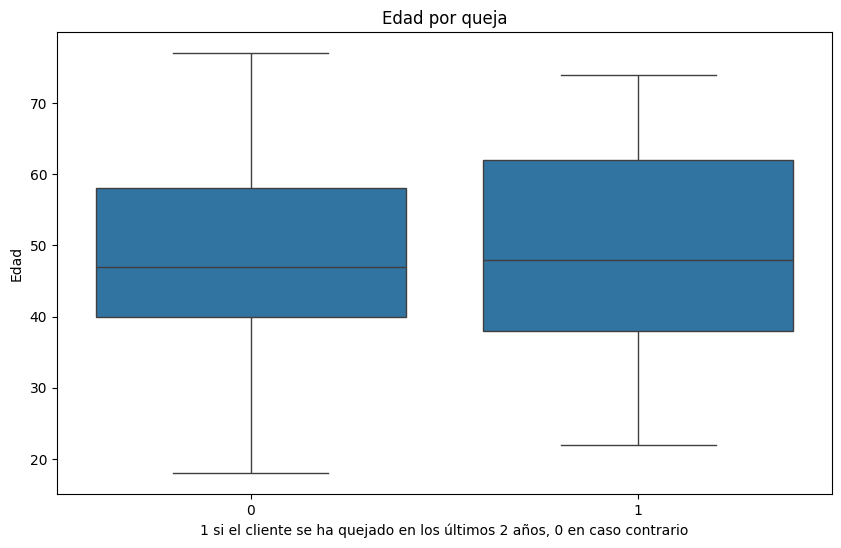

In [24]:
# Edad de nacimiento por queja en los últimos 2 años
plt.figure(figsize=(10, 6))
sns.boxplot(x='Complain', y='Age', data=df)
plt.title('Edad por queja')
plt.xlabel('1 si el cliente se ha quejado en los últimos 2 años, 0 en caso contrario')
plt.ylabel('Edad')
plt.show()

### Distribución de compras con descuento por nivel educativo - **NO es significativo**

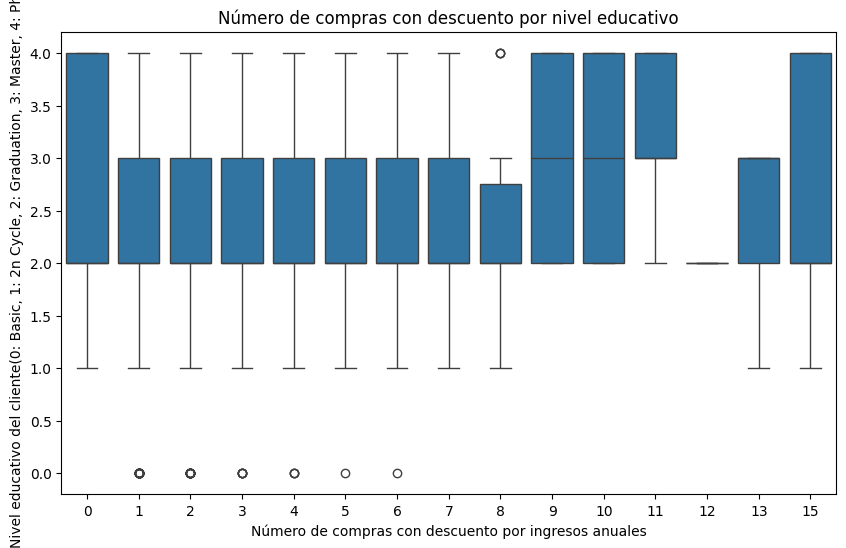

In [25]:
# Educación por el número de compras realizadas con descuento
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumDealsPurchases', y='Education', data=df)
plt.title('Número de compras con descuento por nivel educativo')
plt.xlabel('Número de compras con descuento por ingresos anuales')
plt.ylabel('Nivel educativo del cliente(0: Basic, 1: 2n Cycle, 2: Graduation, 3: Master, 4: PhD)')
plt.show()

### Relación entre antigüedad del cliente y la aceptación de la oferta en la última campaña - **Hay una relación clara**: Cuanto más antigüo, más confianza y mejor aceptación de las campañas

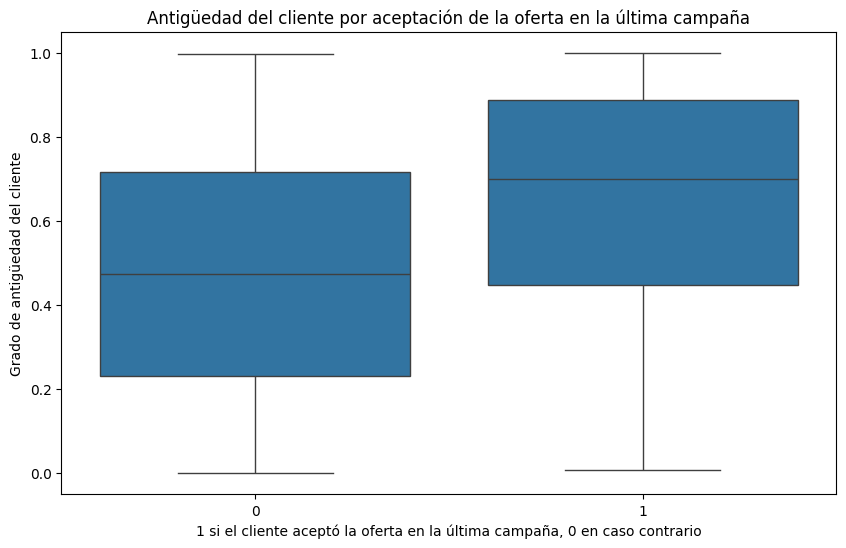

In [26]:
# Antigüedad del cliente por la aceptación de la oferta en la última campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Seniority', data=df)
plt.title('Antigüedad del cliente por aceptación de la oferta en la última campaña')
plt.xlabel('1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario')
plt.ylabel('Grado de antigüedad del cliente')
plt.show()

### Pero **NO hay relación** entre antigüedad del cliente y la aceptación de alguna campaña

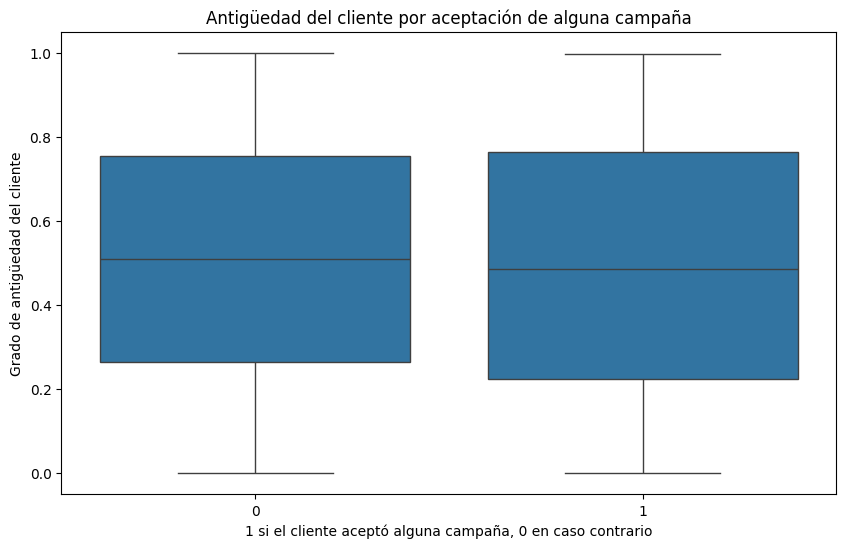

In [27]:
# Antigüedad del cliente por la aceptación de alguna campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='AcceptedCmp', y='Seniority', data=df)
plt.title('Antigüedad del cliente por aceptación de alguna campaña')
plt.xlabel('1 si el cliente aceptó alguna campaña, 0 en caso contrario')
plt.ylabel('Grado de antigüedad del cliente')
plt.show()

### Impacto de cada campaña en la antigüedad del cliente

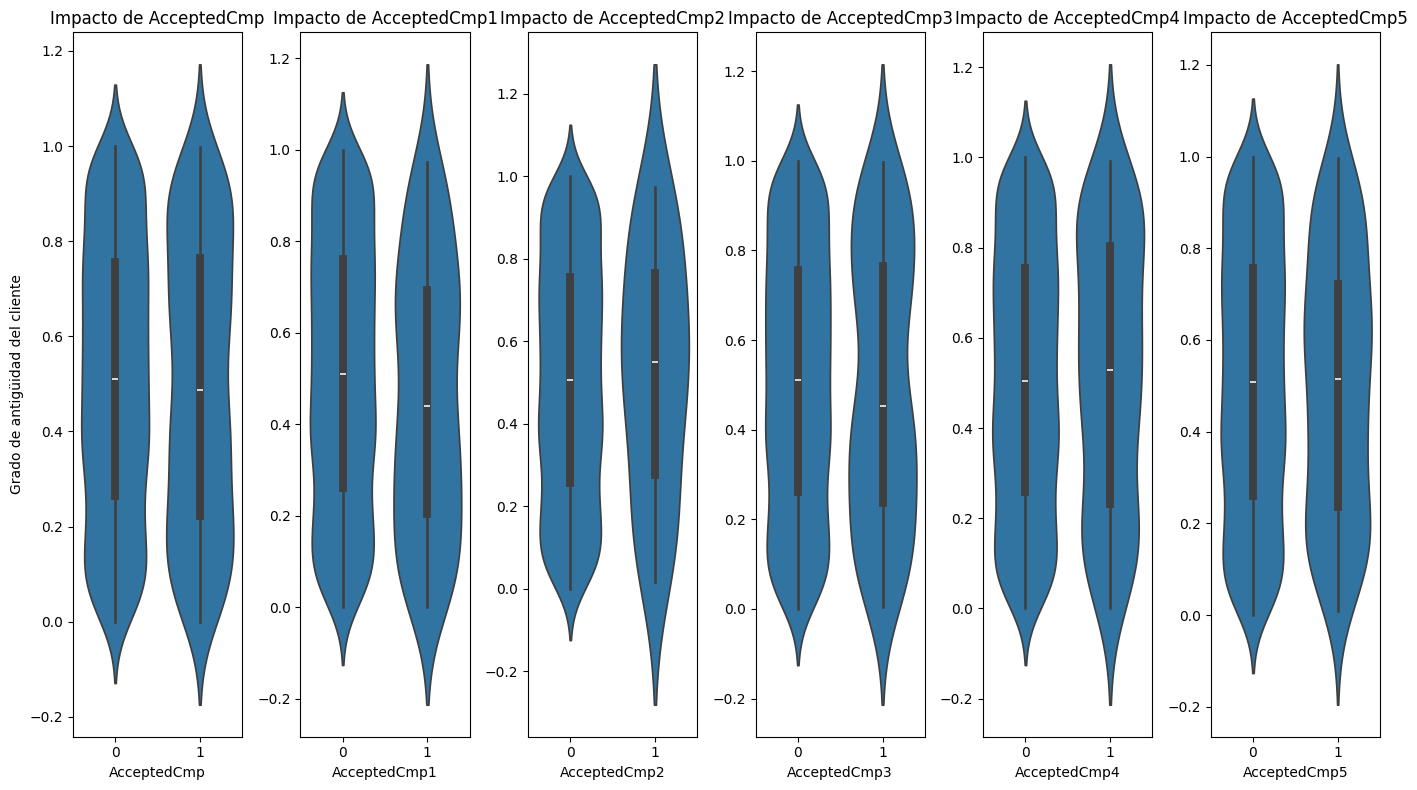

In [28]:
# Crear una lista de columnas de campañas
campaign_columns = ['AcceptedCmp', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Configurar la figura
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín para cada campaña
for i, column in enumerate(campaign_columns, 1):
    plt.subplot(1, 6, i)
    sns.violinplot(x=column, y='Seniority', data=df, inner='box')
    plt.title(f'Impacto de {column}')
    plt.xlabel(column)
    plt.ylabel('Grado de antigüidad del cliente' if i == 1 else '')

plt.tight_layout()
plt.show()

### ¿El sueldo es equiparable al nivel educativo? - **Claramente SÍ**

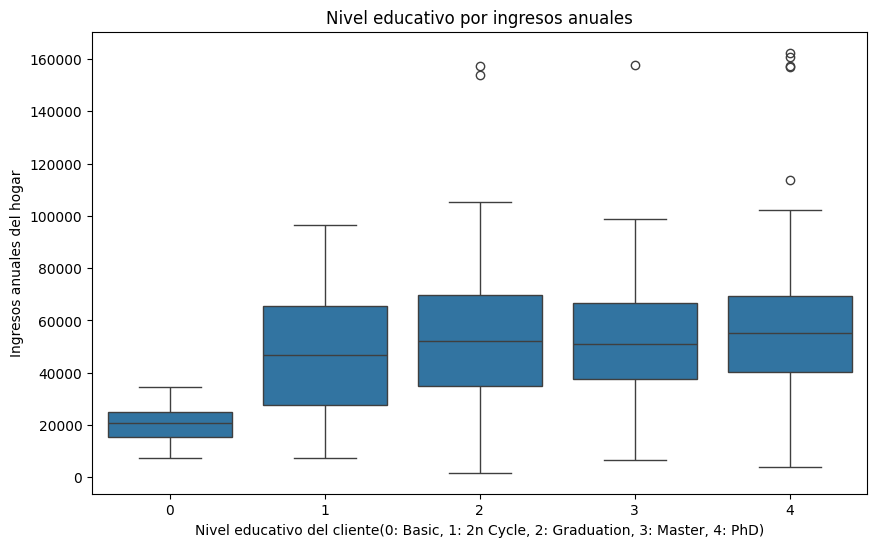

In [29]:
# Ingresos anuales del hogar por nivel educativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Nivel educativo por ingresos anuales')
plt.xlabel('Nivel educativo del cliente(0: Basic, 1: 2n Cycle, 2: Graduation, 3: Master, 4: PhD)')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

### Relación entre la edad y los ingresos anuales del hogar - **No hay relación, pero hay menos ingresos bajos para los mayores**

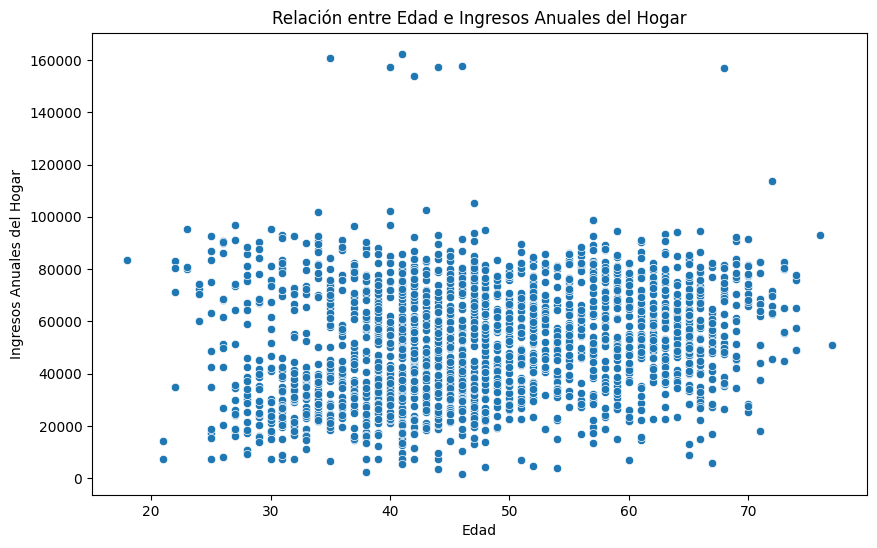

In [30]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)

# Añadir títulos y etiquetas
plt.title('Relación entre Edad e Ingresos Anuales del Hogar')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales del Hogar')

# Mostrar el gráfico
plt.show()

## Mapa de Calor Correlaciones

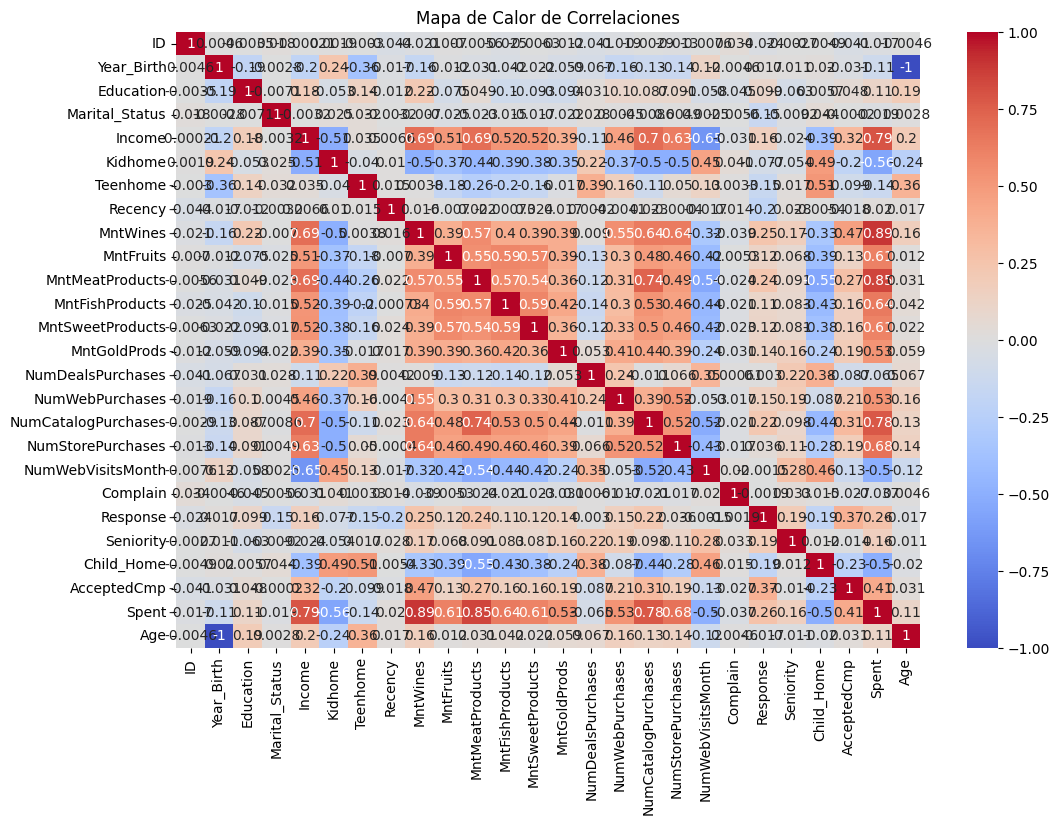

In [31]:
# Lista de columnas a excluir
columns_to_exclude = ['Days', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Crear un nuevo DataFrame excluyendo las columnas especificadas
df_filtered = df.drop(columns=columns_to_exclude)

# Generar la matriz de correlación
corr_matrix = df_filtered.corr(numeric_only=True)

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

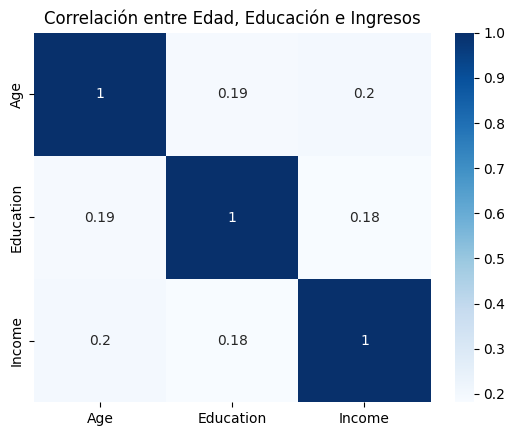

In [32]:
plt.title('Correlación entre Edad, Educación e Ingresos')
sns.heatmap(data= df[['Age', 'Education', 'Income']].corr(), annot= True, cmap='Blues')
plt.show()

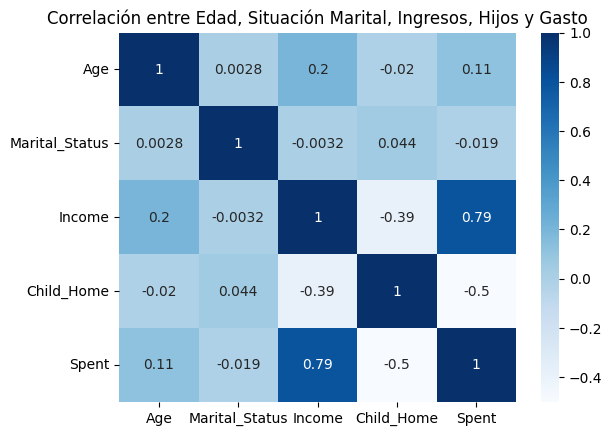

In [33]:
plt.title('Correlación entre Edad, Situación Marital, Ingresos, Hijos y Gasto')
sns.heatmap(data= df[['Age', 'Marital_Status','Income', 'Child_Home', 'Spent']].corr(), annot= True, cmap='Blues')
plt.show()

### Existe una buena correlación de 0,79 entre Ingresos y Gasto: **Los clientes ricos hacen mayor ticket**.

## Ranking de las 10 mejores correlaciones

In [34]:
import numpy as np

# Generar la matriz de correlación excluyendo las columnas especificadas
correlation_matrix = df.drop(columns=columns_to_exclude).corr(numeric_only=True)

# Filtrar la matriz triangular superior
triu = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))

# Obtener las correlaciones más cercanas a 1 o -1 (positivas y negativas)
best_correlations = triu.unstack().sort_values(ascending=False)

# Eliminar autocorrelaciones
best_correlations = best_correlations[best_correlations.index != best_correlations.name]

# Seleccionar las 10 mejores correlaciones
top_correlations = best_correlations.head(10)

# Mostrar las 10 mejores correlaciones
print("Las 10 mejores correlaciones:")
print(top_correlations)

Las 10 mejores correlaciones:
Spent                MntWines               0.893482
                     MntMeatProducts        0.846130
                     Income                 0.792362
                     NumCatalogPurchases    0.780546
NumCatalogPurchases  MntMeatProducts        0.735253
                     Income                 0.696262
MntMeatProducts      Income                 0.692767
MntWines             Income                 0.688300
Spent                NumStorePurchases      0.675343
                     MntFishProducts        0.642657
dtype: float64


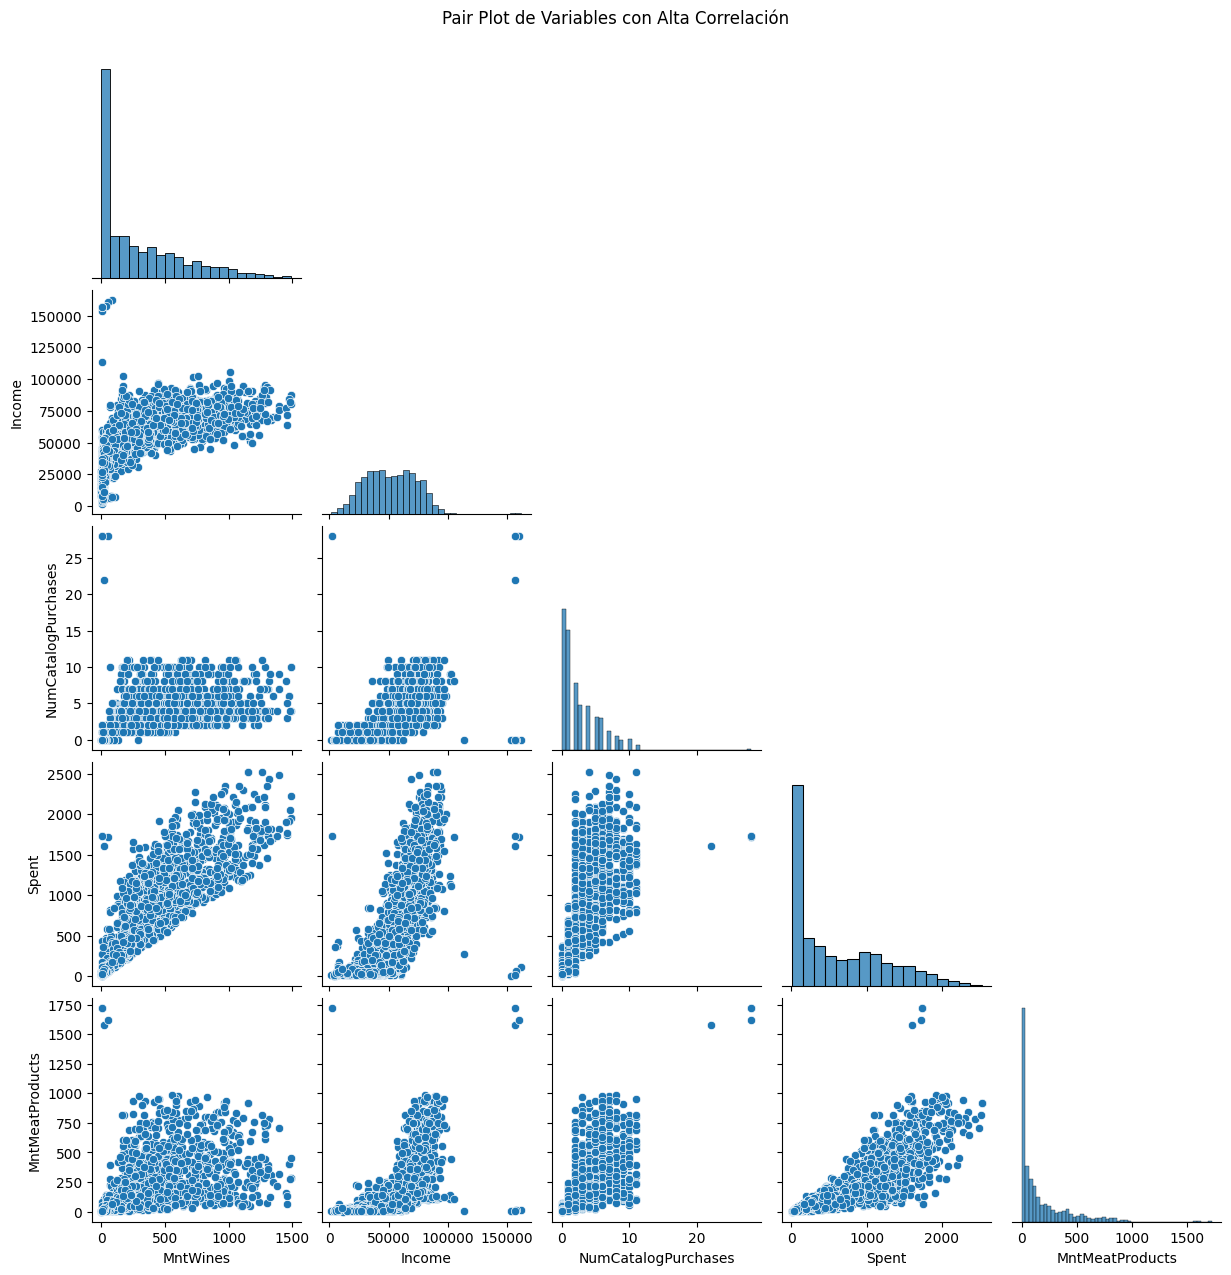

In [35]:
top_corr_pairs = top_correlations.index[:5]

high_corr_features = list(set([col for pair in top_corr_pairs for col in pair]))

sns.pairplot(df[high_corr_features], corner=True)
plt.suptitle("Pair Plot de Variables con Alta Correlación", y=1.02)
plt.show()

Ecuación de la regresión lineal: y = 0.50x + 1.61


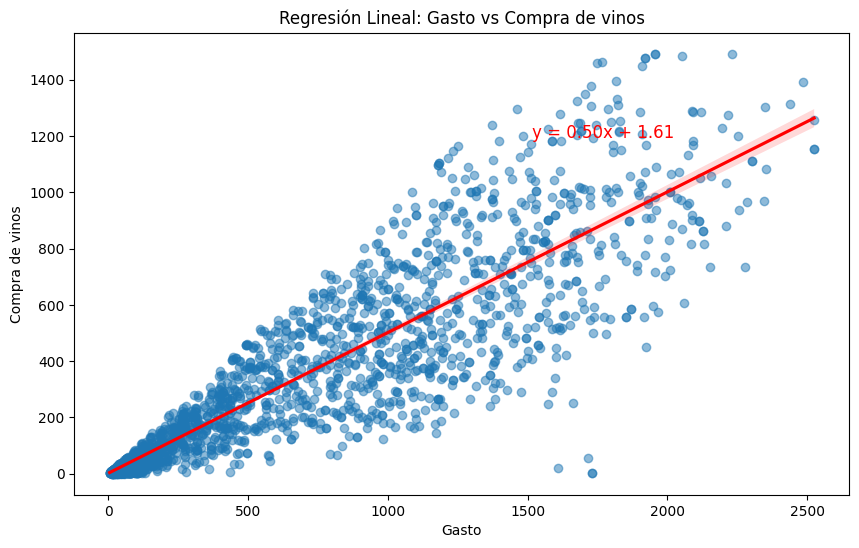

In [36]:
# Calcular la regresión lineal
m, b = np.polyfit(df['Spent'], df['MntWines'], 1)

print(f"Ecuación de la regresión lineal: y = {m:.2f}x + {b:.2f}")

# Visualizar la regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Spent', y='MntWines', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Regresión Lineal: Gasto vs Compra de vinos')
plt.xlabel('Gasto')
plt.ylabel('Compra de vinos')

# Mostrar la ecuación en el gráfico
plt.text(df['Spent'].max() * 0.6, df['MntWines'].max() * 0.8, f"y = {m:.2f}x + {b:.2f}", fontsize=12, color='red')

plt.show()

Filas antes de la limpieza: 2212
Filas después de la limpieza: 1138
Estimación con un 51.45% de los datos.
Ecuación ajustada sin outliers: y = 0.0000x² + -0.0143x + 193.0472


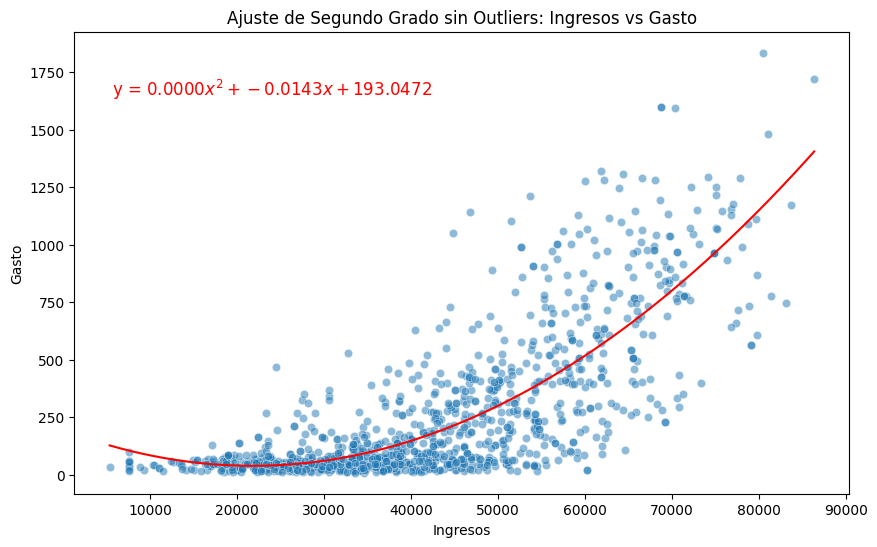

In [37]:
# Calcular Q1, Q3 e IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrar eliminando outliers usando IQR
mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = df[mask]

# Mostrar información
print(f"Filas antes de la limpieza: {len(df)}")
print(f"Filas después de la limpieza: {len(df_clean)}")
print(f"Estimación con un {(len(df_clean)/len(df))*100:.2f}% de los datos.")

# Ajustar la curva de segundo grado
a, b, c = np.polyfit(df_clean['Income'], df_clean['Spent'], 2)
print(f"Ecuación ajustada sin outliers: y = {a:.4f}x² + {b:.4f}x + {c:.4f}")

# Generar valores para la curva ajustada
x_vals = np.linspace(df_clean['Income'].min(), df_clean['Income'].max(), 500)
y_vals = a * x_vals**2 + b * x_vals + c

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spent', data=df_clean, alpha=0.5)
plt.plot(x_vals, y_vals, color='red', label='Ajuste de segundo grado')

# Formatear y mostrar la ecuación en la gráfica
equation_text = f"${a:.4f}x^2 + {b:.4f}x + {c:.4f}$"
plt.text(df_clean['Income'].min() * 1.05, df_clean['Spent'].max() * 0.9, 
         f"y = {equation_text}", fontsize=12, color='red')

# Títulos y leyenda
plt.title('Ajuste de Segundo Grado sin Outliers: Ingresos vs Gasto')
plt.xlabel('Ingresos')
plt.ylabel('Gasto')

# Mostrar gráfico
plt.show()

Ecuación ajustada de tercer grado: y = -0.0000x³ + 0.0000x² + -0.0401x + 442.6661


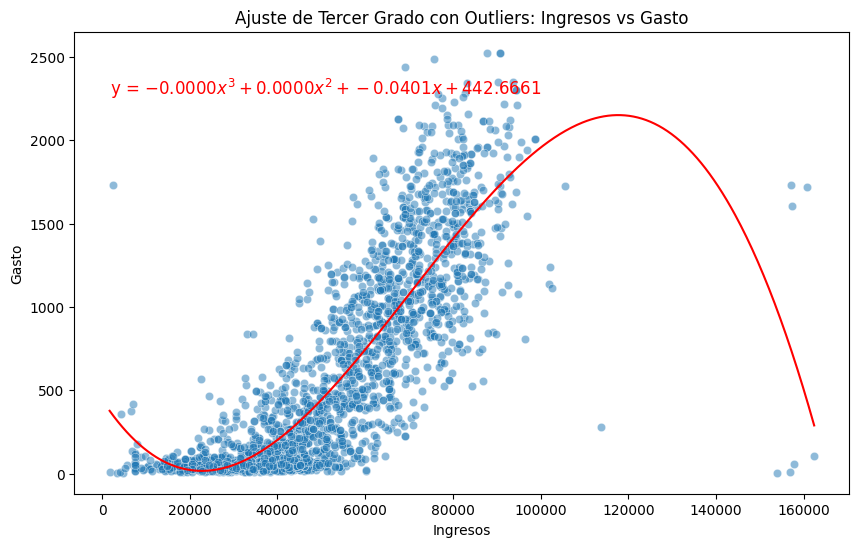

In [38]:
# Ajustar la curva de tercer grado usando TODOS los datos
coeffs = np.polyfit(df['Income'], df['Spent'], 3)
a, b, c, d = coeffs
print(f"Ecuación ajustada de tercer grado: y = {a:.4f}x³ + {b:.4f}x² + {c:.4f}x + {d:.4f}")

# Generar valores para la curva ajustada
x_vals = np.linspace(df['Income'].min(), df['Income'].max(), 500)
y_vals = sum(c * x_vals**i for i, c in enumerate(reversed(coeffs)))

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spent', data=df, alpha=0.5)
plt.plot(x_vals, y_vals, color='red', label='Ajuste de tercer grado')

# Formatear y mostrar la ecuación en la gráfica
equation_text = f"${a:.4f}x^3 + {b:.4f}x^2 + {c:.4f}x + {d:.4f}$"
plt.text(df['Income'].min() * 1.05, df['Spent'].max() * 0.9, 
         f"y = {equation_text}", fontsize=12, color='red')

# Títulos y leyenda
plt.title('Ajuste de Tercer Grado con Outliers: Ingresos vs Gasto')
plt.xlabel('Ingresos')
plt.ylabel('Gasto')

# Mostrar gráfico
plt.show()

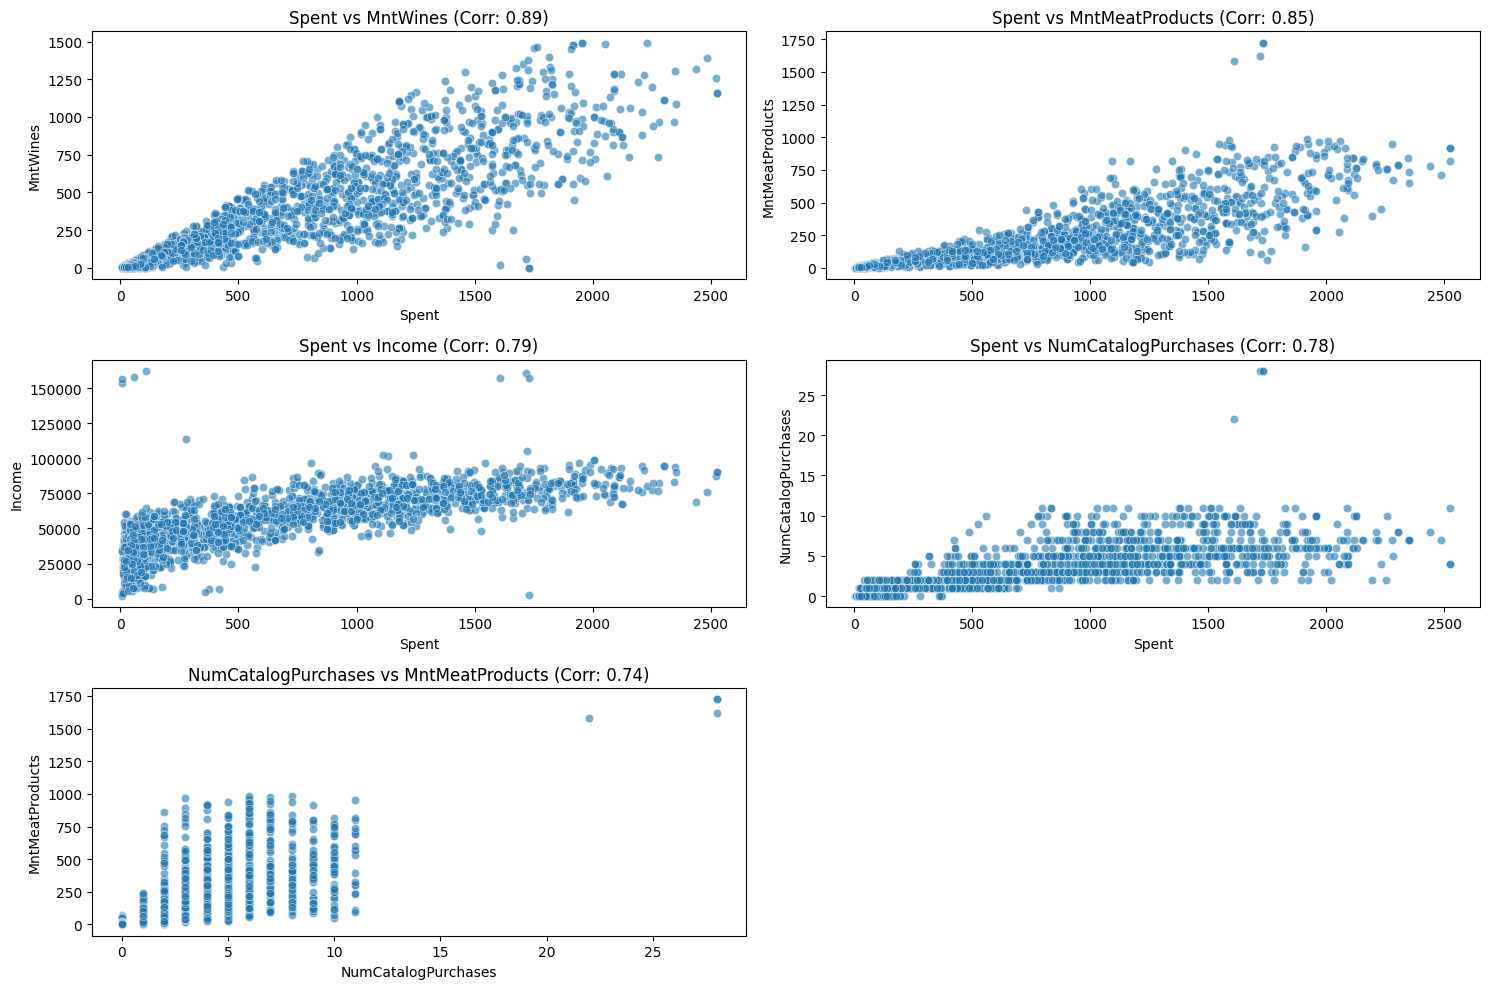

In [39]:
plt.figure(figsize=(15, 10))
for i, (col1, col2) in enumerate(top_corr_pairs):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6)
    plt.title(f"{col1} vs {col2} (Corr: {correlation_matrix.loc[col1, col2]:.2f})")
plt.tight_layout()
plt.show()

## Ranking de las mejores correlaciones entre Consumo `Spent` y características **Personales**
Intentaremos explicar el nivel de consumo de un cliente a través de sus datos personales.

No incluimos `Year_Birth`, porque ya tenemos `Age` que se ha definido del anterior y que ambos tendrían la misma correlación.

Calculemos el coeficiente de correlación de Pearson entre `Spent` y cada variable numérica en el conjunto de datos. Luego, ordenamos los valores de mayor a menor para identificar las variables más influyentes.

In [40]:
# Lista de características personales a evaluar
personal_features = ['Education', 'Marital_Status', 'Income', 
                     'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Seniority', 
                     'Child_Home', 'Age']

# Calcular las correlaciones de Pearson con 'Spent'
correlations = df[personal_features + ['Spent']].corr()['Spent'].drop('Spent')

# Ordenar de mayor a menor en valor absoluto
ranking = correlations.abs().sort_values(ascending=False)

# Mostrar el ranking de correlaciones
print("Ranking de mejores correlaciones con 'Spent':")
print(ranking)

Ranking de mejores correlaciones con 'Spent':
Income            0.792362
Kidhome           0.558005
Child_Home        0.502355
Seniority         0.159123
Teenhome          0.137258
Age               0.114826
Education         0.110246
Complain          0.037386
Recency           0.019536
Marital_Status    0.018573
Name: Spent, dtype: float64


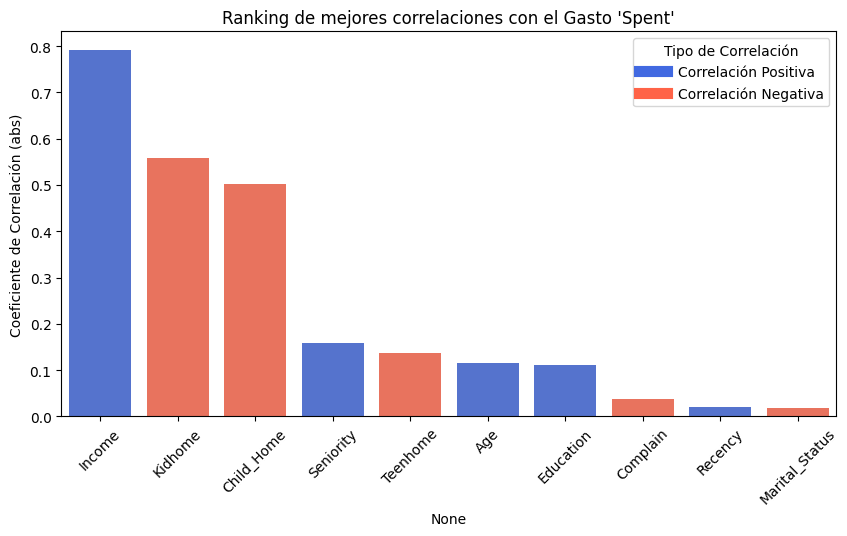

In [41]:
# Recuperar los signos originales para los colores
ranking_sign = ["positive" if correlations[col] >= 0 else "negative" for col in ranking.index]

# Crear el gráfico de barras con los colores correctos
plt.figure(figsize=(10,5))
sns.barplot(x=ranking.index, y=ranking.values, hue=ranking_sign, 
            palette={"positive": "royalblue", "negative": "tomato"}, legend=False)

# Rotar etiquetas del eje X
plt.xticks(rotation=45)
plt.ylabel("Coeficiente de Correlación (abs)")
plt.title("Ranking de mejores correlaciones con el Gasto 'Spent'")

# Agregar una leyenda manual con colores correctos
legend_labels = {"positive": "Correlación Positiva", "negative": "Correlación Negativa"}
handles = [plt.Line2D([0], [0], color=color, lw=8) for color in ["royalblue", "tomato"]]
plt.legend(handles, legend_labels.values(), title="Tipo de Correlación")

# Mostrar el gráfico
plt.show()